In [105]:
import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# rdir = "results-wd.5e-3/"
# rdir="results-wd.1e-4"
# rdir="results --wd 5e-3 --reg_multiscale"
# rdir="results --wd 5e-3"
# rdir="results --batch_size 32 --n_grid 25 --reg_multiscale --no_fit_ratio_scale"
rdir="var_1-ratio_1-pos_0-dout_0.0-erm_1"
datasets = [d for d in os.listdir(f"../{rdir}") if not d.startswith(".")]

results = []
curves = []
for dset in datasets:
    dirs =  [d for d in os.listdir(f"../{rdir}/{dset}") if not d.startswith(".")]

    for dir in dirs:
        runs = [d for d in os.listdir(f"../{rdir}/{dset}/{dir}") if not d.startswith(".")] 
        for seed in runs:
            exp_dir = f"../{rdir}/{dset}/{dir}/{seed}"
            with open(f"{exp_dir}/metrics.yaml", 'r') as io:
                metrics = yaml.safe_load(io)

            with open(f"{exp_dir}/config.yaml", 'r') as io:
                cfg = yaml.safe_load(io)
            metrics['seed'] = int(seed)
            metrics['combo'] = int(cfg['combo_reg'])
            metrics['var'] = "Yes" if int(cfg['var_reg']) else "No"
            metrics['ratio'] = "Yes" if int(cfg['ratio_reg']) else "No"
            metrics['dataset'] = dset
            metrics['dir'] = dir
            results.append(metrics)

            curve = pd.read_csv(f"{exp_dir}/curve.csv")
            curve['seed'] = int(seed)
            curve['var'] = int(cfg['var_reg'])
            curve['ratio'] = int(cfg['ratio_reg'])
            curve['dataset'] = dset
            curve['dir'] = dir
            curves.append(curve)

results = pd.DataFrame(results)
curves = pd.concat(curves)

In [107]:
results.groupby(['dataset', 'dir']).mean().reset_index()

,dataset,dir,@0.1,@0.5,curve,density_negll,last_saved_epoch,ratio_reg_loss,seed,total_loss,var_reg_loss,combo,pos_reg_loss
0,ihdp-N,var_0-ratio_0-pos_0-dout_0.0-erm_1,0.358134,0.750885,0.451174,3.064022,799.0,NaN,11.5,3.064022,NaN,0.0,NaN
1,ihdp-N,var_0-ratio_0-pos_0-dout_0.25-erm_1,0.358061,0.750718,0.451088,3.063982,799.0,NaN,11.5,3.063982,NaN,0.0,NaN
2,ihdp-N,var_0-ratio_0-pos_1-dout_0.25-erm_1,0.358057,0.750715,0.451086,3.063972,799.0,NaN,11.5,3.087651,NaN,0.0,0.023680
3,ihdp-N,var_0-ratio_1-pos_0-dout_0.0-erm_1,0.302602,0.695722,0.410526,3.048091,799.0,0.402761,11.5,3.450852,NaN,0.0,NaN
4,ihdp-N,var_0-ratio_1-pos_0-dout_0.25-erm_1,0.302428,0.695663,0.410444,3.048032,799.0,0.402311,11.5,3.450344,NaN,0.0,NaN
5,ihdp-N,var_1-ratio_0-pos_0-dout_0.0-erm_1,0.455547,0.383906,0.367233,3.087737,799.0,NaN,11.5,4.023064,0.935327,0.0,NaN
6,ihdp-N,var_1-ratio_1-pos_0-dout_0.0-erm_1,0.374492,0.380982,0.321645,3.064629,799.0,0.412631,11.5,4.383368,0.906109,1.0,NaN
7,ihdp-N,var_1-ratio_1-pos_1-dout_0.25-erm_1,0.373477,0.379909,0.320599,3.064298,799.0,0.412442,11.5,4.383750,0.883323,1.0,0.023687
8,news-N,var_0-ratio_0-pos_0-dout_0.0-erm_1,0.049450,0.018000,0.033146,3.123931,799.0,NaN,11.5,3.123931,NaN,0.0,NaN
9,news-N,var_0-ratio_0-pos_0-dout_0.25-erm_1,0.049449,0.017999,0.033145,3.123944,799.0,NaN,11.5,3.123944,NaN,0.0,NaN


In [108]:
results.groupby(['dataset', 'dir']).std().reset_index()

,dataset,dir,@0.1,@0.5,curve,density_negll,last_saved_epoch,ratio_reg_loss,seed,total_loss,var_reg_loss,combo,pos_reg_loss
0,ihdp-N,var_0-ratio_0-pos_0-dout_0.0-erm_1,0.101980,0.194386,0.087506,0.012810,0.0,NaN,7.071068,0.012810,NaN,0.0,NaN
1,ihdp-N,var_0-ratio_0-pos_0-dout_0.25-erm_1,0.102020,0.194411,0.087529,0.012828,0.0,NaN,7.071068,0.012828,NaN,0.0,NaN
2,ihdp-N,var_0-ratio_0-pos_1-dout_0.25-erm_1,0.102022,0.194405,0.087527,0.012827,0.0,NaN,7.071068,0.012827,NaN,0.0,3.147133e-07
3,ihdp-N,var_0-ratio_1-pos_0-dout_0.0-erm_1,0.103416,0.193972,0.091276,0.014242,0.0,0.002143,7.071068,0.015895,NaN,0.0,NaN
4,ihdp-N,var_0-ratio_1-pos_0-dout_0.25-erm_1,0.103400,0.193912,0.091352,0.014275,0.0,0.003161,7.071068,0.016923,NaN,0.0,NaN
5,ihdp-N,var_1-ratio_0-pos_0-dout_0.0-erm_1,0.099051,0.182463,0.069146,0.014717,0.0,NaN,7.071068,0.161251,0.160057,0.0,NaN
6,ihdp-N,var_1-ratio_1-pos_0-dout_0.0-erm_1,0.099405,0.181633,0.067056,0.015807,0.0,0.002164,7.071068,0.097392,0.089751,0.0,NaN
7,ihdp-N,var_1-ratio_1-pos_1-dout_0.25-erm_1,0.099090,0.181421,0.067025,0.015941,0.0,0.003063,7.071068,0.105089,0.103895,0.0,5.954386e-06
8,news-N,var_0-ratio_0-pos_0-dout_0.0-erm_1,0.035540,0.012183,0.008546,0.010676,0.0,NaN,7.071068,0.010676,NaN,0.0,NaN
9,news-N,var_0-ratio_0-pos_0-dout_0.25-erm_1,0.035541,0.012183,0.008546,0.010686,0.0,NaN,7.071068,0.010686,NaN,0.0,NaN


Plot curves

In [109]:
# curves_means = curves.groupby(['dataset', 'var', 'ratio', 'delta']).mean().reset_index().set_index(['dataset', 'var', 'ratio'])
# curves_stdevs = curves.groupby(['dataset', 'var', 'ratio', 'delta']).std().reset_index().set_index(['dataset', 'var', 'ratio'])
# # D_var0_ratio0 = curves[curves.combo == 0]
# curves_means

========== ihdp-N =========


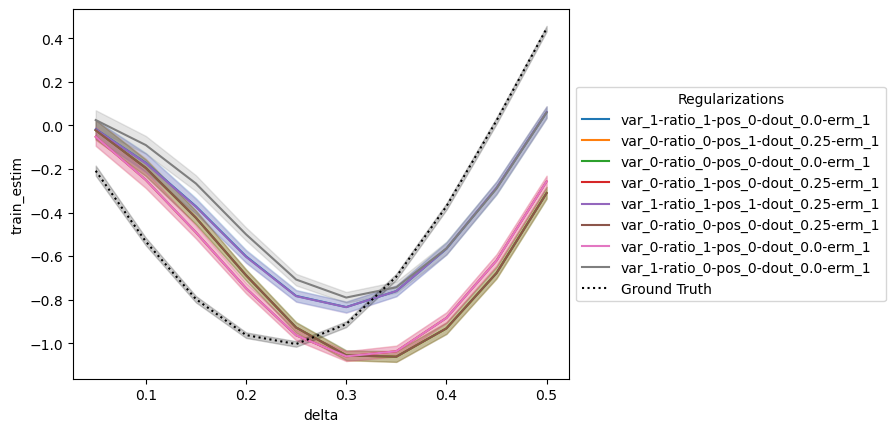

========== sim-N =========


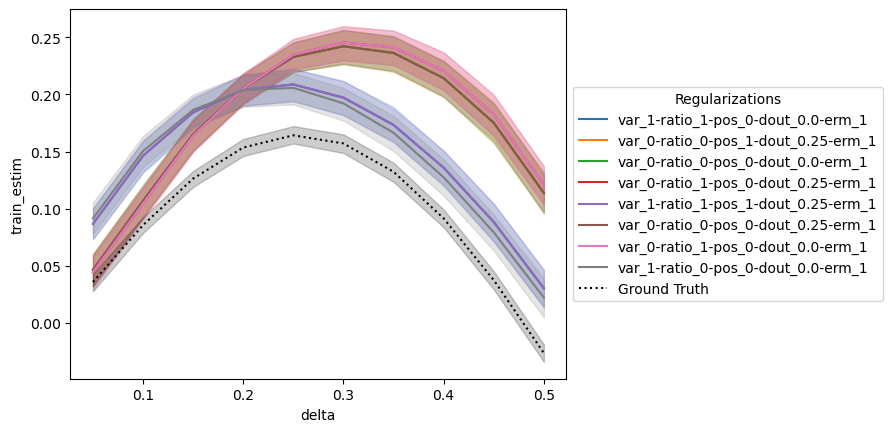

========== news-N =========


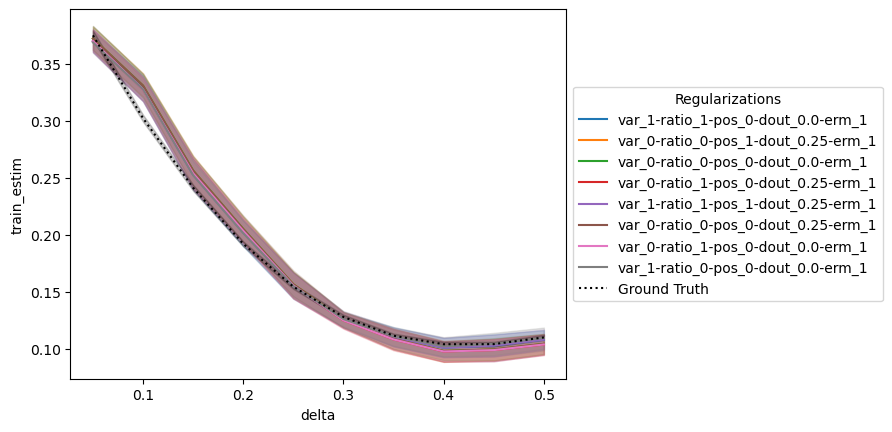

In [112]:
for dset in datasets:
    print(f"========== {dset} =========")
    part = "test"
    D = curves[curves.dataset == dset]
    truth = D[(D.var == 0) & (D.ratio == 0)][["delta", f"{part}_truth"]]
    sns.lineplot(x="delta", y="train_estim", hue="dir", data=D, legend=True)
    sns.lineplot(x="delta", y=f"{part}_truth", label="Ground Truth", c="black", ls=":", data=D, legend=True)
    plt.legend(title='Regularizations', loc='center left', bbox_to_anchor=(1, 0.5))
   
    plt.show()